    Objectius
    Neteja i interpretació de les dades.
    Preprocessats.
    Creació de models de classificació (arbres de classificació, KNN - k-Nearest neighbors, regressió logística, support vector machine, XGboost, altres models...).
    Utilització de les mètriques per interpretar els resultats.
    Estudi i modificació de paràmetres.

## Importació i exploració de dades

In [ ]:
import warnings

# Ignorar las advertencias FutureWarning temporalmente
warnings.filterwarnings("ignore", category=FutureWarning)

# Tu código aquí

# Restablecer las advertencias a su estado original si es necesario
# warnings.resetwarnings()


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Ocultar Warnings
import warnings

# Ignorar las advertencias FutureWarning temporalmente
warnings.filterwarnings("ignore", category=FutureWarning)


In [16]:
# Imprimir el fitxer txt    
with open("wineNames.txt") as wineNames:
    print(wineNames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

### Descripció de les variables:
1) Alcohol: <br/> L'alcohol en el vi es refereix al contingut d'etanol i afecta la sensació de calor i la intensitat del vi.
   <br/> <br/>
2) Malic acid: <br/>L'àcid màlic contribueix a l'acidesa del vi i pot influir en el seu sabor, aportant notes àcides o fresques.
    <br/>   <br/>
3) Ash: <br/>La cendra és la quantitat de minerals presents en el vi després de l'evaporació, la qual cosa pot estar relacionada amb la qualitat de la raïm i el procés de vinificació.
    <br/> <br/>
4) Alcalinity of ash: <br/>L'alcalinitat de la cendra es refereix al nivell d'alcalinitat dels minerals en el vi i pot afectar el seu sabor i estabilitat.
    <br/> <br/>
5) Magnesium:<br/> El magnesi és un mineral que pot influir en la percepció del sabor i la textura del vi.
    <br/> <br/>
6) Total phenols:<br/> Els fenols totals són compostos que poden contribuir a l'estructura i el sabor del vi, així com a la seva capacitat antioxidant.
    <br/> <br/>
7) Flavanoids:<br/> Els flavonoides són un tipus de fenols que aporten sabor i color al vi, contribuint al seu perfil d'aroma i gust.
    <br/> <br/>
8) Nonflavanoid phenols: Els fenols no flavonoides (Nonflavanoid phenols) són altres compostos fenòlics que poden tenir efectes en la textura i el sabor del vi.
    <br/> <br/>
9) Proanthocyanins: <br/>Les proantocianidines són compostos fenòlics que poden contribuir a l'astringència i l'estructura del vi.
    <br/> <br/>
10) Color intensity:<br/> La intensitat del color es refereix a la profunditat i riquesa del color del vi, la qual cosa pot estar relacionada amb la concentració de pigments.
    <br/> <br/>
11) Hue: <br/>La to es refereix al matís del color del vi, que pot variar des de vermell a morat, per exemple.
    <br/> <br/>
12) OD280/OD315 of diluted wines: La relació OD280/OD315 de vins diluïts és una mesura que pot indicar la concentració de compostos fenòlics en el vi.
    <br/> <br/>
13) Proline: La prolina és un aminoàcid que pot influir en la textura i el sabor del vi, i també s'utilitza per avaluar la maduresa de la raïm.
 <br/> <br/>
    

#### Importar dades crues des de txt


In [4]:
df = pd.read_csv("wineData.txt")
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
# Afegir columnes 
df.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
# Comprovar que les classes són les mateixes que les descrites a wineNames.txt
# Class Distribution: number of instances per class
# class 1 59
# class 2 71
# class 3 48
df['Class'].value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

Falta una dada de la class 1 respecte a wineNames.txt. Hem comprovat amb la suma total (177 rows) i podem confirmar que segons wineNames.txt hauria d'haver una línia més de la class 1 (9 + 71 + 48 = 178, contra 177 línies)


#### Comprovació de valors nuls 

In [30]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [31]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

No hi ha valors nuls

#### Comprovació de duplicats

In [32]:
df[df.duplicated()]


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline


No hi ha valos duplicats

#### Exploració de variables

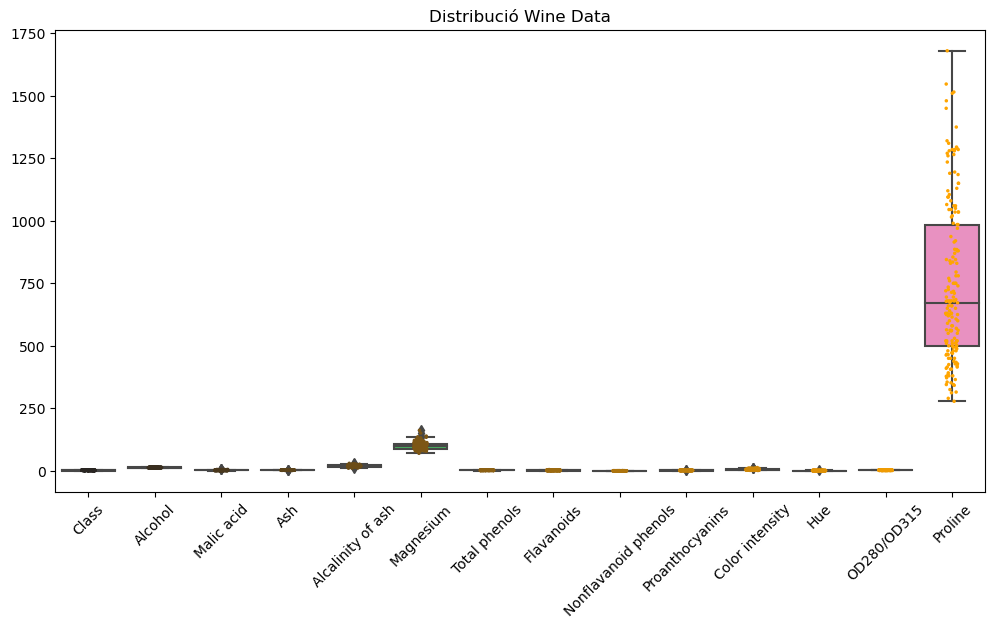

In [42]:
# Boxplot amb jitter per explorar dades

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df)
sns.stripplot(data=df, color="orange", jitter=0.1, size=2.5)
plt.title('Distribució Wine Data')
plt.xticks(rotation=45)
plt.show()


Amb els valors alts de proline, no es pot visualitzar la resta de vaiables. Refarem el boxplot sense la columna "Proline" i treurem també "Magnesium" per explorar la resta de variables.

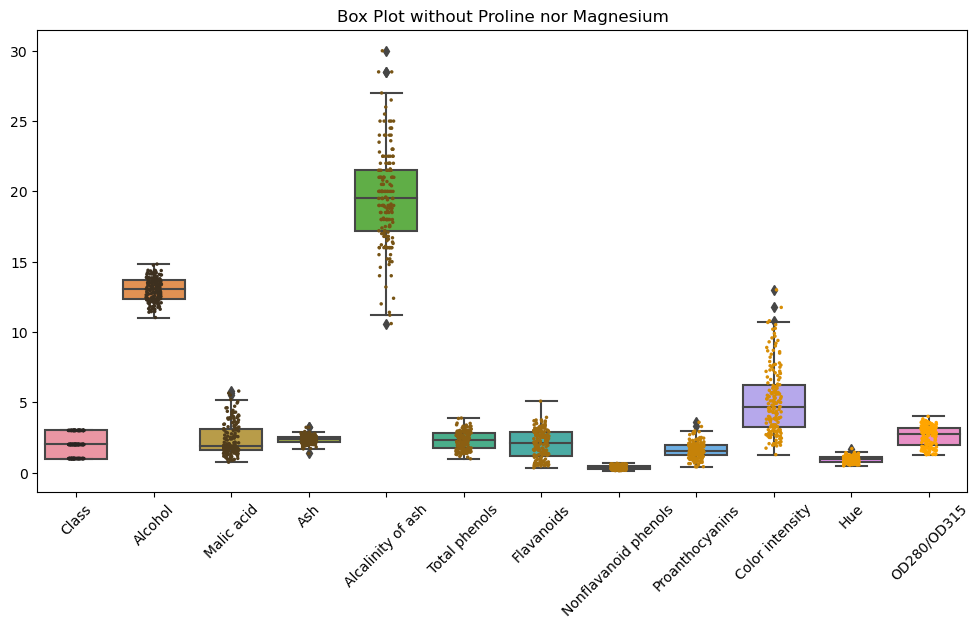

In [51]:
# Seleccionar columnes
columns_to_plot = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315"]

# Crear df
df_noproline = df[columns_to_plot]

# Boxplot amb jitter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_noproline)
sns.stripplot(data=df_noproline, color="orange", jitter=0.1, size=2.5)

plt.xticks(rotation=45)
plt.title("Box Plot without Proline nor Magnesium")
plt.show()



Veiem que la distribució de cada variable és bastant compacta dins de la seva forquilla de valors i que hi ha en general pocs outliers.

A continuació explorem la correlació de les varibales a través d'un mapa de calor.

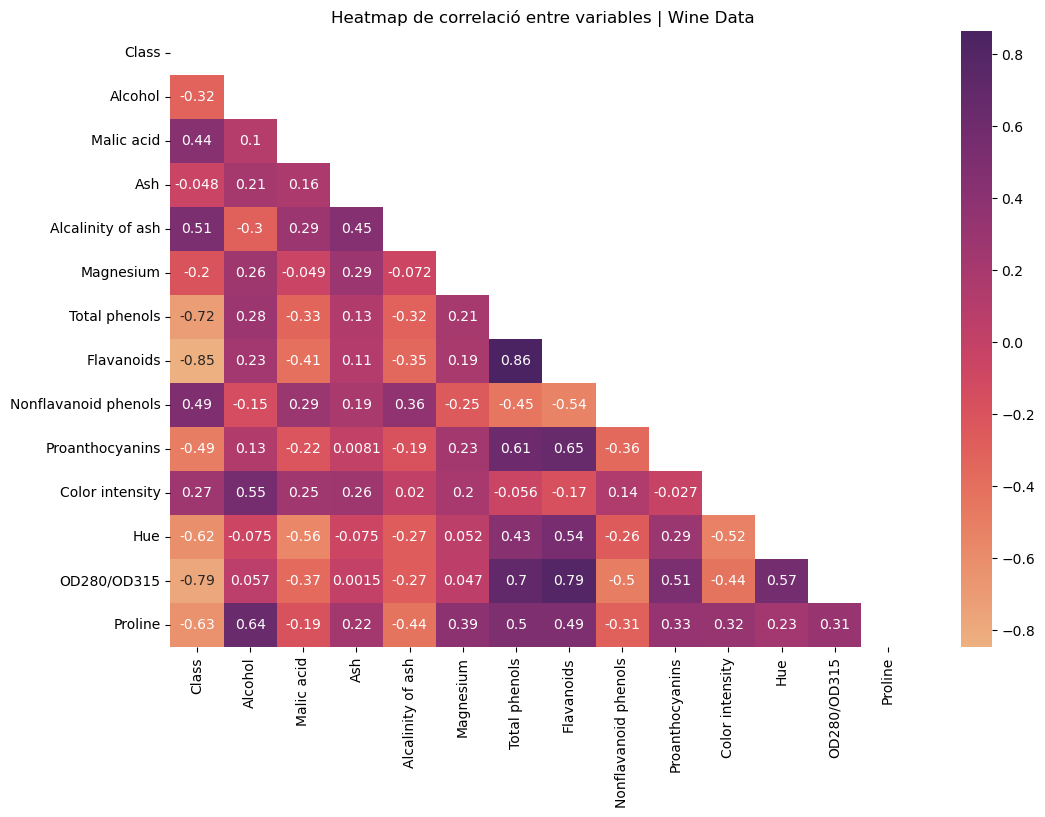

In [52]:
plt.figure(figsize=(12, 8))
matriz_corr = df.corr()

# Màscara per a ocultar la meitat superior del mapa de calor
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# MAPA DE CALOR
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(matriz_corr, annot=True, cmap=cmap, mask=mask)
plt.title('Heatmap de correlació entre variables | Wine Data')
plt.show()

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.





# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.



# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.



# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
